# Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\karti\OneDrive\Desktop\Python portfolio project\hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# EDA 

In [4]:
# Number of rows and columns
s = df.shape
print(f'The data have {s[0]} rows and {s[1]} columns')

The data have 119390 rows and 32 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# chaning the datatype of reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date']

0        2015-01-07
1        2015-01-07
2        2015-02-07
3        2015-02-07
4        2015-03-07
            ...    
119385   2017-06-09
119386   2017-07-09
119387   2017-07-09
119388   2017-07-09
119389   2017-07-09
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [7]:
# Printing the categorical columns
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
# printing the values of categorical columns
for col in df.describe(include = 'object').columns:
    print(df[col].name)
    print(df[col].unique())
    print('----'*20)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [9]:
# Checking missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Dropping the columns and rows
df.drop(['company','agent'],axis = 1, inplace = True) 
df.dropna(inplace = True)

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:xlabel='adr'>

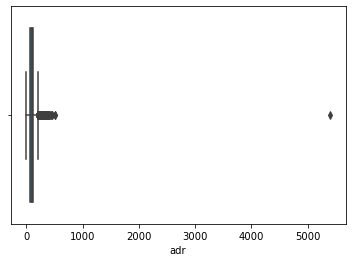

In [12]:
sns.boxplot(x = 'adr', data = df)

<AxesSubplot:xlabel='adr'>

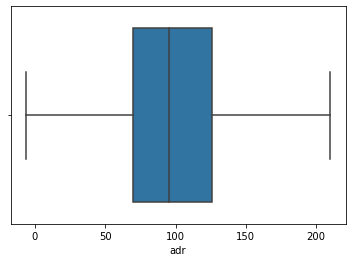

In [13]:
#removing outliers from adr(average daily rate) column
Q1 = df.adr.quantile(0.25)
Q3 = df.adr.quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3+1.5* IQR
lower_limit = Q1-1.5* IQR
df.adr = np.where(df.adr>upper_limit,upper_limit,np.where(df.adr<lower_limit,lower_limit,df.adr))
sns.boxplot(x = 'adr', data = df)

In [14]:
# adding month column
df['month'] = df['reservation_status_date'].dt.month
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-03-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-06-09,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,210.00,0,2,Check-Out,2017-07-09,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-07-09,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-07-09,7


# Data Analysis and Visualization

### Percentage of cancelled orders

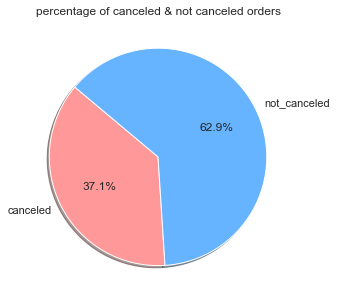

In [62]:
# percentge of cancelled orders
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)*100
cancelled_percentage
labels = ['canceled', 'not_canceled']
size = [cancelled_percentage[1], cancelled_percentage[0]]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize = (10,5))
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('percentage of canceled & not canceled orders')
plt.show()
# print(f'the percentage of canceled orders is {round(cancelled_percentage[1],0)}')


In [58]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)*100
cancelled_percentage

0    62.864808
1    37.135192
Name: is_canceled, dtype: float64

### Hotel wise cancellation

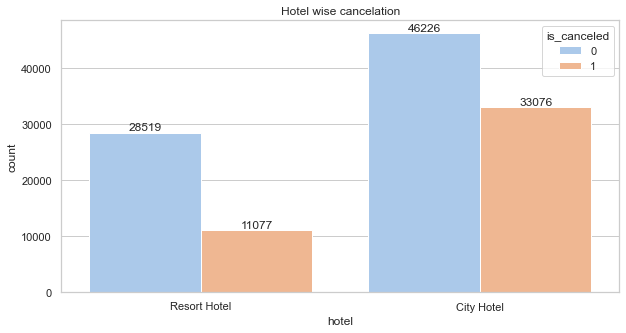

In [99]:
plt.figure(figsize = (10,5))
sns.set(style="whitegrid")
a = sns.countplot(x='hotel', hue = 'is_canceled', palette='pastel', data = df)
plt.title('Hotel wise cancelation')
for i in a.containers:
    a.bar_label(i)

plt.show()

In [97]:
resort['is_canceled'] == 0

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-03-07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-10-09,10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-10-09,10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-12-09,12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14,9


In [41]:
df[df['hotel'] == 'Resort Hotel'].groupby('is_canceled')[['is_canceled']].count()
print(f'The canceled orders in city hotels are 11077 and non_canceled are 28519')

The canceled orders in city hotels are 11077 and non_canceled are 28519


In [40]:
df[df['hotel'] == 'City Hotel'].groupby('is_canceled')[['is_canceled']].count()
print(f'The canceled orders in city hotels are 33076 and non_canceled are 46226')

The canceled orders in city hotels are 33076 and non_canceled are 46226


### ADR(Average daily rate) comparision between Resort Hotel, City Hotel

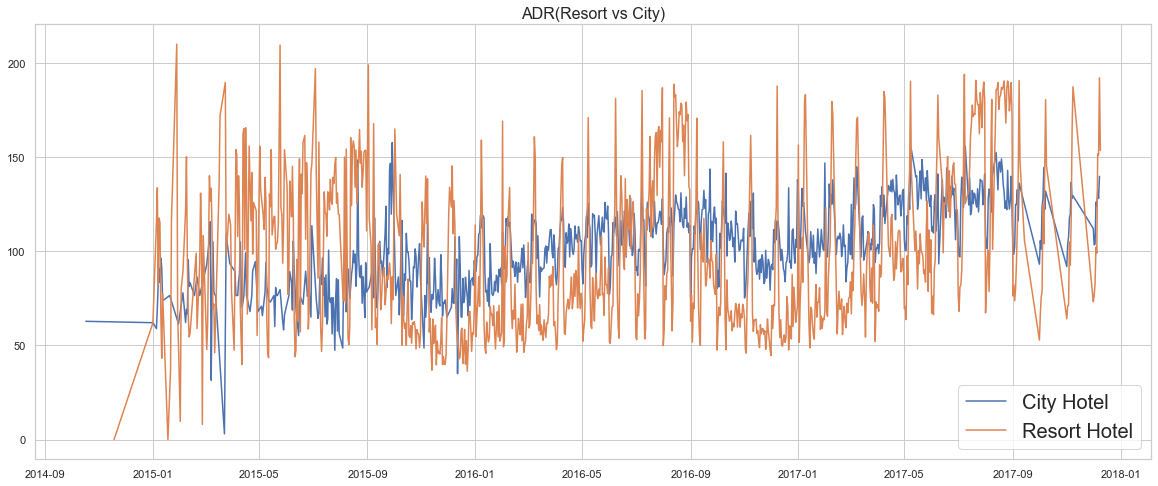

In [71]:
city_hotel = df[df['hotel'] == 'City Hotel']
resort_hotel = df[df['hotel'] == 'Resort Hotel']

plt.figure(figsize = (20,8))
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean().reset_index()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean().reset_index()

plt.plot(city_hotel['reservation_status_date'], city_hotel['adr'], label = 'City Hotel')
plt.plot(resort_hotel['reservation_status_date'], resort_hotel['adr'], label = 'Resort Hotel')
plt.legend(fontsize = 20)
plt.title('ADR(Resort vs City)', fontsize = 16)
plt.show()


### Month wise cancelation status

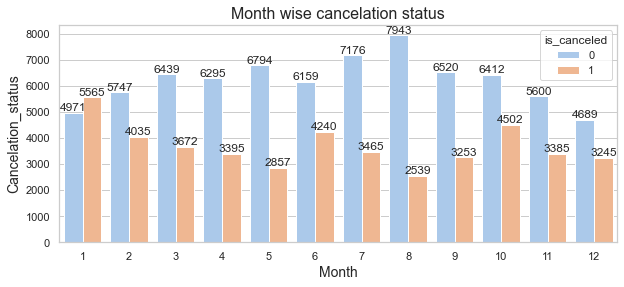

IN JANUARY MONTH THE CANCELATION ARE HIGHEST AND IN AUGUST IT'S LOWEST


In [109]:
plt.figure(figsize=(10, 4))
a =sns.countplot(x='month', hue='is_canceled', data=df, palette='pastel')
for i in a.containers:
    a.bar_label(i)

# Add title and labels
plt.title('Month wise cancelation status', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cancelation_status', fontsize=14)
plt.bar_label()

plt.show()
print(F"IN JANUARY MONTH THE CANCELATION ARE HIGHEST AND IN AUGUST IT'S LOWEST")

### Month wise ADR(average daily rate) only for canceled bookings

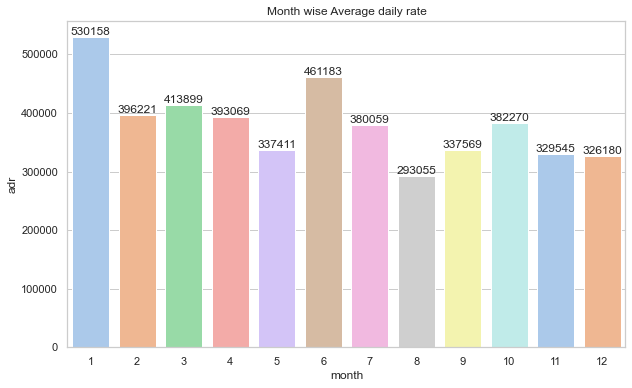

In [110]:
plt.figure(figsize=(10, 6))
a = sns.barplot(x = 'month', y =  'adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), palette='pastel')
plt.title('Month wise Average daily rate')
for i in a.containers:
    a.bar_label(i)
plt.show()


#### cancelation by countries(Top 10)

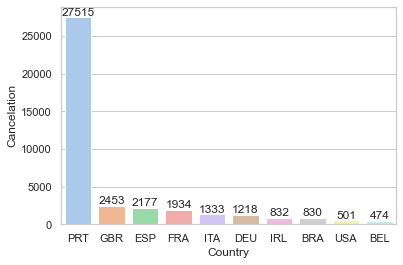

In [111]:
canceled_data = df[df['is_canceled'] == 1]
country_canceled = canceled_data['country'].value_counts()[:10].reset_index()


a = sns.barplot(x = country_canceled['index'], y = country_canceled['country'], palette = 'pastel')
for i in a.containers:
    a.bar_label(i)
plt.xlabel('Country')
plt.ylabel('Cancelation')
plt.show()


#### Market segment wise cancelation in percentage

In [22]:
canceled_data['market_segment'].value_counts(normalize = True)*100

Online TA        46.968496
Groups           27.397912
Offline TA/TO    18.748443
Direct            4.348515
Corporate         2.215025
Complementary     0.203837
Aviation          0.117772
Name: market_segment, dtype: float64

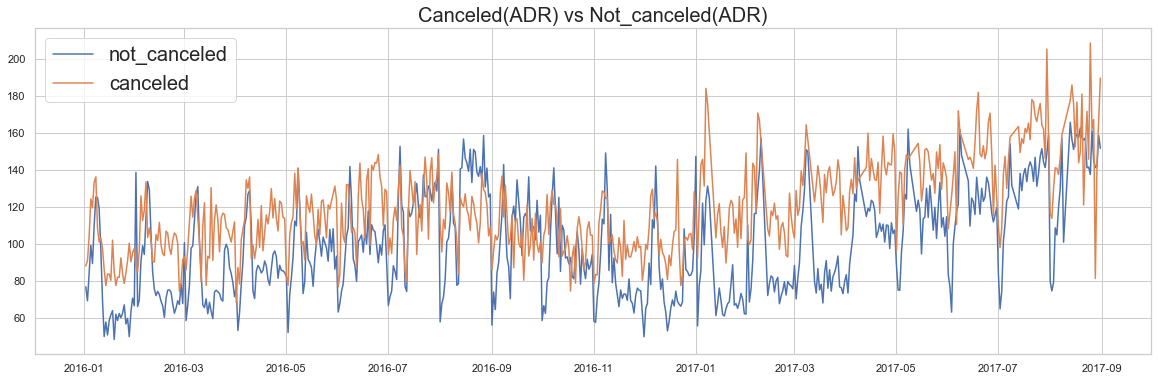

In [52]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016')&(canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016')&(not_canceled_df_adr['reservation_status_date']<'2017-09')]

plt.figure(figsize = (20,6))
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'not_canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend(fontsize = 20)
plt.title('Canceled(ADR) vs Not_canceled(ADR)',fontsize = 20)
plt.show()

# The analysis ended here there is a powerpoint file attached in the same folder look into that for whole analysis